
# Non Linear Regression Analysis on China's GDP


## Objectives

-   Fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014.
-   Evauluate the accuracy of the model using mean absolute error, residual sum of squares, and R2-score.

<h2 id="importing_libraries">Importing required libraries</h2>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<a id="ref2"></a>
## About the data set

The dataset that will be used contains two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year. 

In [2]:
%%capture
#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

In [3]:
#passing the csv file to a pandas df
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Plotting the Dataset

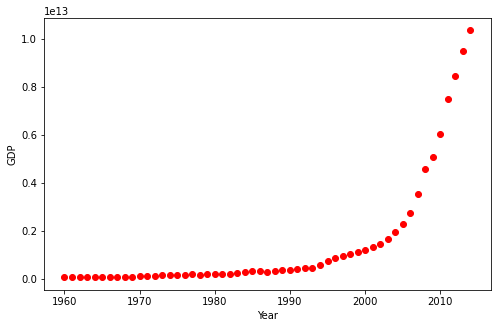

In [4]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

The graph resembles either a logistic or exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerate slightly in the 2010s.

### Choosing a model

From an initial look at the sample logistic plot below, it can be determined that the logistic function could be the better approximation for China's GDP graph,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

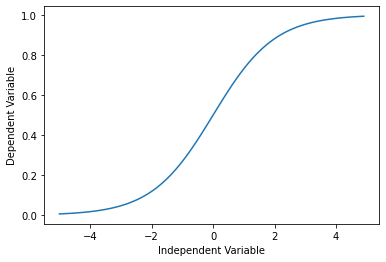

In [5]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

The formula for the logistic function is the following:

$$ \\hat{Y} = \\frac1{1+e^{\\beta_1(X-\\beta_2)}}$$

$\\beta_1$: Controls the curve's steepness,

$\\beta_2$: Slides the curve on the x-axis.


### Building The Model

In [6]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Testing a random sample sigmoid line that might fit with the data:

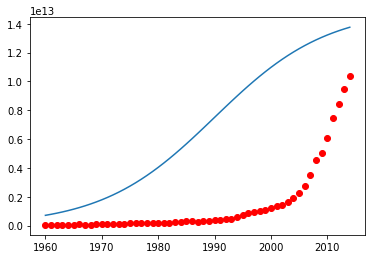

In [7]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

The goal here is to find the best parameters the model. First is to normalize x and y:

In [8]:
#normalizing the data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### Determining The Best Parameters For The Model

**curve_fit** uses non-linear least squares to fit the sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, \*popt) - ydata is minimized.

"popt" will be the variable containing the optimized parameters.

In [9]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.447527, beta_2 = 0.997207


Plotting the resulting regression model.

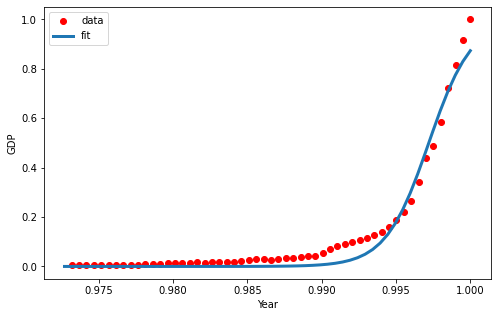

In [10]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Calculating the accuracy of the model.

In [11]:
# splitting the data into train/test sets
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# building the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predicting using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.98
